Numerical schemes for differential equations: Simple examples
=============================================================
Leonhard Scheck, LMU München

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
magma()

Convergence behaviour of forward, backward and centered differences.

In [3]:
def finite_differences(n) :
    
    # we will compute the numerical derivative of f(t)=sin(t) for t=t0
    t0 = 1.0
    
    # for grid spacings h between 1/n and 1
    h = 1.0/arange(1,n+1)
    
    # compute finite differences for all h values
    fd_p = zeros(h.size)
    fd_m = zeros(h.size)
    fd_c = zeros(h.size)
    for i in range(h.size) :
        # foreward
        fd_p[i] = (sin(t0+h[i]) - sin(t0)     ) / h[i]
        # backward
        fd_m[i] = (sin(t0)      - sin(t0-h[i])) / h[i]
        # centered
        fd_c[i] = (sin(t0+h[i]) - sin(t0-h[i])) / (2*h[i])
    
    figure(1,figsize=(13.5,4.5))
    clf()
    
    # plot function and points used for the finite differences
    subplot(131)
    t = linspace(0,2,100)
    plot( t, sin(t), 'k' )
    plot( (t0), (sin(t0)), '.k' )
    plot( (t0-h.min(),t0+h.min()), (sin(t0-h.min()),sin(t0+h.min())), 'b')
    plot( (t0-h.min(),t0), (sin(t0-h.min()),sin(t0)), 'g' )
    plot( (t0,t0+h.min()), (sin(t0),sin(t0+h.min())), 'r')
    ylim((0,1.1))
    title("h=%f"%h.min())
    xlabel('t')
    ylabel('sin(t)')
    
    # plot deviation of FD schemes from exact derivative
    subplot(132)
    plot( (h.min(),h.max()), (0,0), ':k')
    semilogx(h, fd_p-cos(t0), 'r', linewidth=3)
    semilogx(h, fd_m-cos(t0), 'g', linewidth=3)
    semilogx(h, fd_c-cos(t0), 'b', linewidth=3)
    if h.min() > 0.1 :
        ylim((-0.3,0.3))
    else :
        ylim((-0.05,0.05))
    xlabel('h')
    title('Finite diff. - analytic derivative')

    # log-log plot of absolute error
    subplot(133)
    loglog(h, abs(fd_p-cos(t0)), 'r', linewidth=3)
    loglog(h, abs(fd_m-cos(t0)), 'g', linewidth=3)
    loglog(h, abs(fd_c-cos(t0)), 'b', linewidth=3)
    title('|Finite diff. - analytic derivative|')
    xlabel('h')

<function __main__.finite_differences>

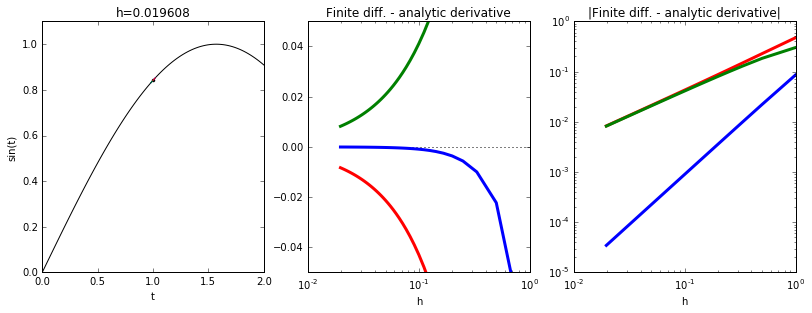

In [4]:
interact( finite_differences, n=(2,100) )

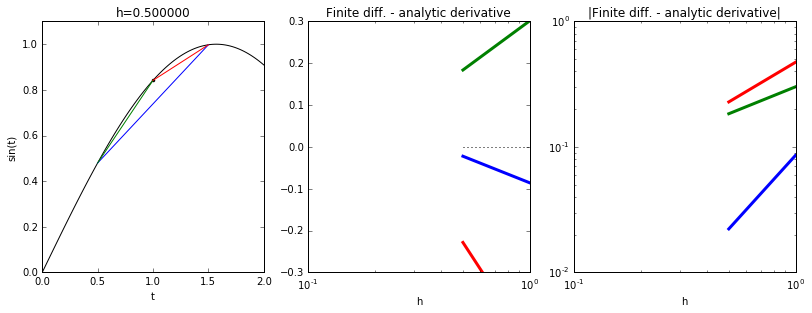

In [5]:
finite_differences(2)

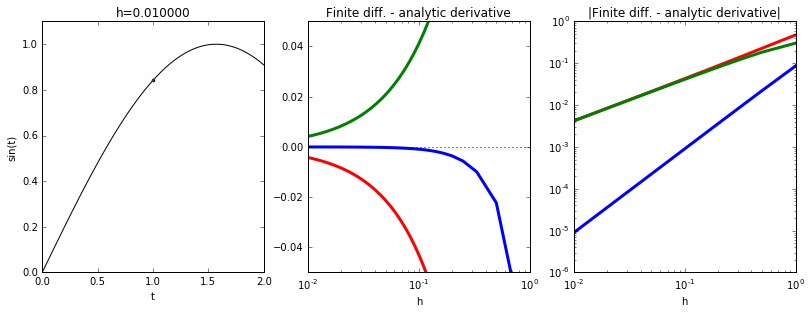

In [6]:
finite_differences(100)

Numerical solution of the first-order ODE $\frac{d}{dt}\Phi=c\Phi$

In [7]:
def solve_exponential_growth( nsteps, first_step='trap', phimax=None ) :
    """Compute numerical solution of the exponential growth/decay equation using several different schemes"""
    
    t_max = 4.0
    c = 1.0
    
    # plot exact solution
    t_fine = linspace(0,t_max,100)
    figure(1,figsize=(9,4.5))
    clf()
    axes((0.05,0.05,0.4,0.9))
    plot( t_fine, exp(c*t_fine), 'k', linewidth=3, label='exact solution' )
    
    # compute & plot numerical solutions
    t = linspace(0,t_max,nsteps+1)
    dt = t[1]-t[0]
    s_eeul = zeros(nsteps+1)
    s_ieul = zeros(nsteps+1)
    s_trap = zeros(nsteps+1)
    s_leap = zeros(nsteps+1)
    # set initial conditions
    s_eeul[0] = 1.0
    s_ieul[0] = 1.0
    s_trap[0] = 1.0
    s_leap[0] = 1.0
    
    # perform nstep integration steps with each method
    for i in range(nsteps) :
        s_eeul[i+1] = s_eeul[i]*(1.0+c*dt)
        s_ieul[i+1] = s_ieul[i]/(1.0-c*dt)
        s_trap[i+1] = s_trap[i]*(1.0+c*dt/2)/(1.0-c*dt/2)
    # leapfrog method: Perform first step using one of the other methods
    if first_step == 'trap' :
        s_leap[1] = s_trap[1]
    elif first_step == 'eeul' :
        s_leap[1] = s_eeul[1]
    elif first_step == 'ieul' :
        s_leap[1] = s_ieul[1]
    elif first_step == 'exact' :
        s_leap[1] = exp(c*dt)
    else :
        raise ValueError('Unknown method '+first_step)
    for i in range(1,nsteps) :
        s_leap[i+1] = s_leap[i-1] + 2*dt*c*s_leap[i]
    
    # plot numerical solutions
    plot( t, s_eeul, '.-r', label='explicit Euler' )
    plot( t, s_ieul, '.-g', label='implicit Euler' )
    plot( t, s_trap, '.-b', label='Trapezoid' )
    plot( t, s_leap, '.-', color='#ff00ff', label='Leapfrog' )
    legend(loc='upper left', title='time step %f'%dt, frameon=False)
    xlabel('t')
    ylabel('phi')
    ylim((0,75))
    
    # plot relative error
    axes((0.55,0.05,0.4,0.9))
    plot( t, 0*t, '--k')
    plot( t, (s_eeul-exp(c*t))/exp(c*t), '.-r' )
    plot( t, (s_ieul-exp(c*t))/exp(c*t), '.-g' )
    plot( t, (s_trap-exp(c*t))/exp(c*t), '.-b' )
    plot( t, (s_leap-exp(c*t))/exp(c*t), '.-', color='#ff00ff' )
    xlabel('t')
    ylabel('(phi-phi_exact)/phi_exact')
    
    if not phimax is None :
        ylim((-phimax,phimax))
    
    

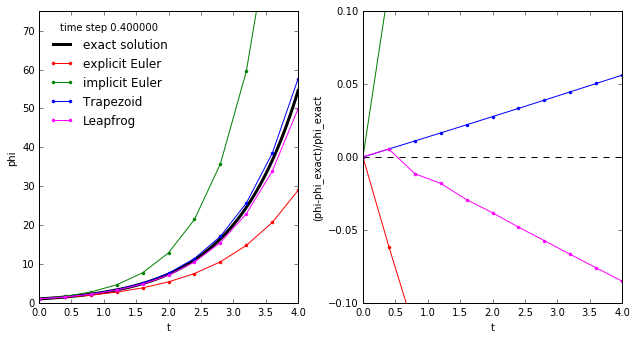

In [8]:
solve_exponential_growth(10,phimax=0.1) #interact( solve_exponential_growth, nsteps=(5,100,5))

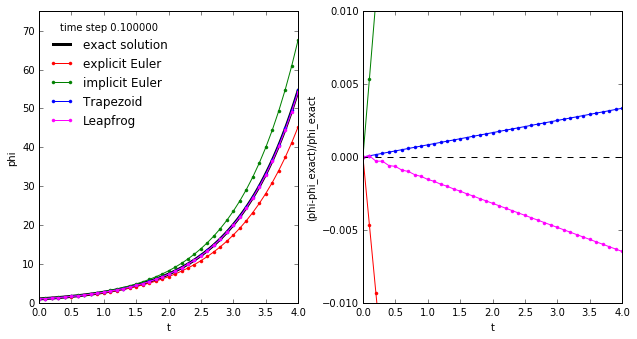

In [9]:
solve_exponential_growth(40,first_step='trap',phimax=0.01)

In [10]:
def solve_harmonic_oscillator( nsteps, omega=0.5, first_step='trap' ) :
    """Compute numerical solution of the harmonic oscillator equation using several different schemes"""
    
    t_max = 4.0
    
    # plot exact solution
    t_fine = linspace(0,t_max,100)
    figure(1,figsize=(13,5))
    clf()
    subplot(121)
    plot( t_fine, cos(omega*t_fine), 'k', linewidth=6, label='exact solution' )
    
    # compute & plot numerical solutions
    t = linspace(0,t_max,nsteps+1)
    dt = t[1]-t[0]
    s_eeul = zeros( nsteps+1, dtype=complex128 )
    s_ieul = zeros( nsteps+1, dtype=complex128 )
    s_trap = zeros( nsteps+1, dtype=complex128 )
    s_leap = zeros( nsteps+1, dtype=complex128 )
    # set initial conditions
    s_eeul[0] = 1.0
    s_ieul[0] = 1.0
    s_trap[0] = 1.0
    s_leap[0] = 1.0
    # amplification factors (complex i = "1j" in python...)
    lam_eeul = 1.0 + 1j*omega*dt
    lam_ieul = 1.0/(1.0 - 1j*omega*dt)
    lam_trap = (1.0 + 0.5*1j*omega*dt) / (1.0 - 0.5*1j*omega*dt)    
    
    # perform nstep integration steps with the single-step methods
    for i in range(nsteps) :
        s_eeul[i+1] = s_eeul[i]*lam_eeul
        s_ieul[i+1] = s_ieul[i]*lam_ieul
        s_trap[i+1] = s_trap[i]*lam_trap

    # copy first step results for leapfrog from one of the other methods
    if first_step == 'trap' :
        s_leap[1] = s_trap[1]
    elif first_step == 'eeul' :
        s_leap[1] = s_eeul[1]
    elif first_step == 'ieul' :
        s_leap[1] = s_ieul[1]
    else :
        raise ValueError('Unknown method '+first_step)

    # perform nstep-1 leapfrog steps
    for i in range(1,nsteps) :
        s_leap[i+1] = s_leap[i-1] + 2*1j*omega*dt*s_leap[i]
    
    # plot numerical solutions
    plot( t, real(s_eeul), '.-r', label='explicit Euler' )
    plot( t, real(s_ieul), '.-g', label='implicit Euler' )
    plot( t, real(s_trap), '.-b', label='Trapezoid' )
    plot( t, real(s_leap), '.-', color='#ff00ff', label='Leapfrog' )
    legend(loc='lower left', title='time step %f'%dt)
    xlabel('t')
    ylabel('phi')
    
    # plot errors
    subplot(122)
    plot( t, 0*t, '--k')
    #plot( t, real(s_eeul)-cos(omega*t), '.-r' )
    #plot( t, real(s_ieul)-cos(omega*t), '.-g' )
    plot( t, real(s_trap)-cos(omega*t), '.-b' )
    plot( t, real(s_leap)-cos(omega*t), '.-', color='#ff00ff' )
    xlabel('t')
    ylabel('phi-phi_exact')
    #ylim((-0.01,0.01))
    

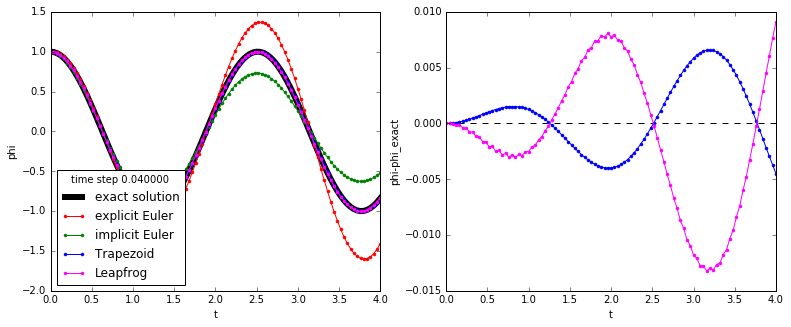

In [11]:
solve_harmonic_oscillator( 100, omega=2.5, first_step='trap' ) # use first explicit euler step as initial data for leapfrog

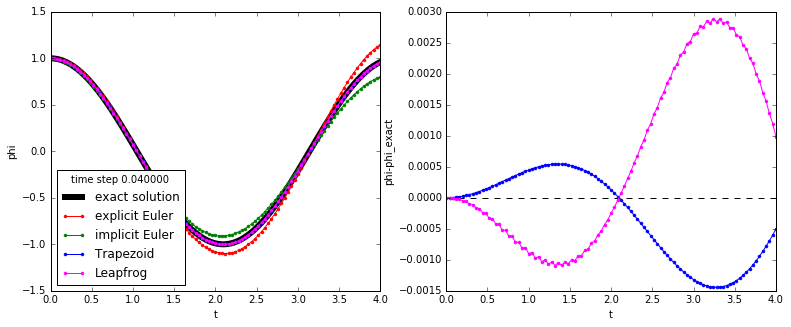

In [12]:
solve_harmonic_oscillator( 100, omega=1.5, first_step='trap' ) # use first trapezoid step as initial data for leapfrog

Upstream scheme applied to the 1D linear advection equation
$\frac{\partial}{\partial t}\Phi + u\frac{\partial}{\partial x}\Phi = 0$

In [13]:
def upstream(alpha,nx=100) :
    """
    Compute numerical solution for the linear advection equation using the upstream scheme
    alpha : Courant number (alpha < 0 means propagation in the wrong direction -> downstream scheme)
    nx    : Number of grid points
    """
    
    nt = int(round(nx/abs(alpha)))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,1,nt)
    phi = zeros((nt,nx))
    phi[0,:] = maximum( -abs(3*x)+1.0, 0 )
    figure(1,figsize=(9,4.5))
    clf()
    axes((0.05,0.05,0.4,0.9))
    plot( x, phi[0,:], 'k', linewidth=2)
    for n in range(nt-1) :
        phi[n+1,:] = phi[n,:] - alpha*(phi[n,:]-roll(phi[n,:],-1))
        #phi[n+1,:] = phi[n,:] - 0.5*alpha*(roll(phi[n,:],1)-roll(phi[n,:],-1))
        if n>0 and n%10 == 0 :
            plot( x, phi[n,:], '#999999')
    plot( x, phi[-1,:], 'r', linewidth=2)
    if phi[-1,:].max() < 1.5 :
        ylim((-0.1,1.0))
        text( -0.45, -0.08, 'final amplitude: %f' % phi[-1,:].max() )
    xlabel('x')
    ylabel('phi')
    axes((0.55,0.05,0.4,0.9))
    imshow(transpose(phi),vmin=0,vmax=1,extent=[0,1,-0.5,0.5])
    xlabel('t')
    ylabel('x')
    
    
    

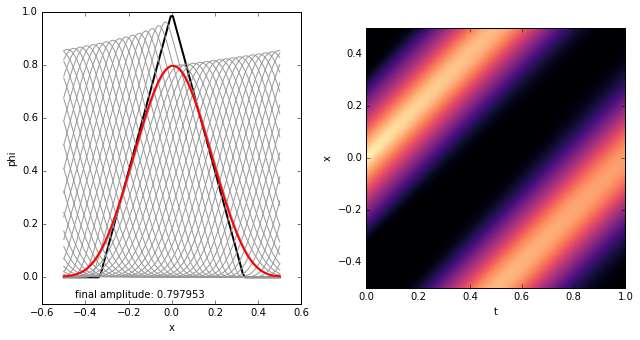

In [14]:
upstream(0.3,nx=100)

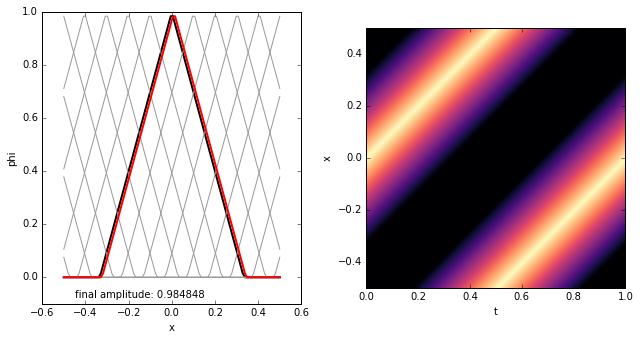

In [15]:
upstream(1.0)

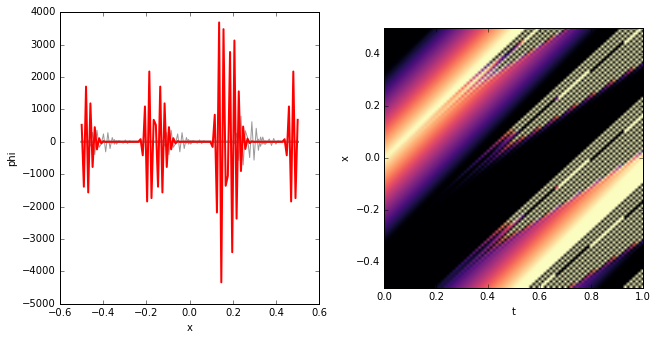

In [47]:
upstream(1.1,nx=100)

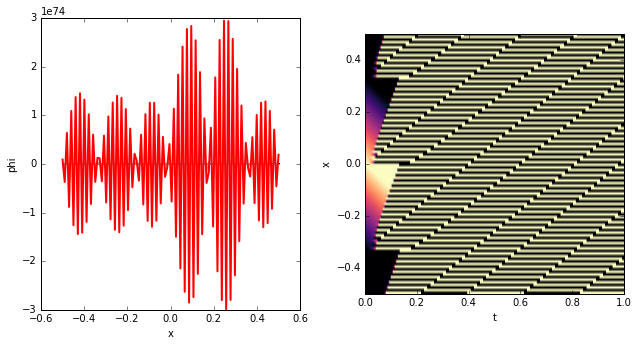

In [17]:
upstream(-0.1) # alpha<0 means propagation in the opposite direction -> "downstream scheme"

Leapfrog scheme for the 1D linear advection equation

In [18]:
def leapfrog(alpha,nx=100) :
    """
    Compute numerical solution for the linear advection equation using the leapfrog scheme.
    alpha : Courant number
    nx    : Number of grid points
    """

    nt = int(round(nx/abs(alpha)))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,1,nt)
    phi = zeros((nt,nx))
    phi[0,:] = maximum( -abs(3*x)+1.0, 0 )
    figure(1,figsize=(9,4.5))
    clf()
    axes((0.05,0.05,0.4,0.9))
    plot( x, phi[0,:], 'k', linewidth=2)

    # first step: upstream scheme
    phi[1,:] = phi[0,:] - alpha*(phi[0,:]-roll(phi[0,:],-1))
    
    # subsequent steps: upstream scheme
    for n in range(1,nt-1) :
        phi[n+1,:] = phi[n-1,:] - alpha*(roll(phi[n,:],1)-roll(phi[n,:],-1))
        if n>0 and n%10 == 0 :
            plot( x, phi[n,:], '#999999')
    plot( x, phi[-1,:], 'r', linewidth=2)
    xlabel('x')
    ylabel('phi')
    xlim((-0.5,0.5))
    if phi[-1,:].max() < 1 :
        ylim((-0.1,1.0))
        text( -0.45, -0.08, 'final amplitude: %f' % phi[-1,:].max() )
        #sqrt(((phi[0,:]-phi[-1,:])**2).mean()) 
        
    # space-time plots
    axes((0.55,0.05,0.4,0.9))
    imshow(transpose(phi),vmin=0,vmax=1,extent=[0,1,-0.5,0.5])
    xlabel('t')
    ylabel('x')


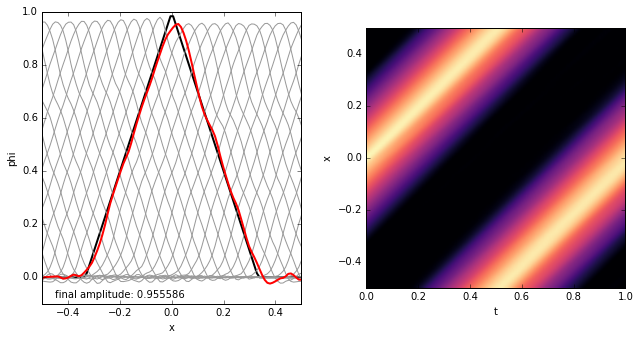

In [19]:
leapfrog(0.5,nx=100)

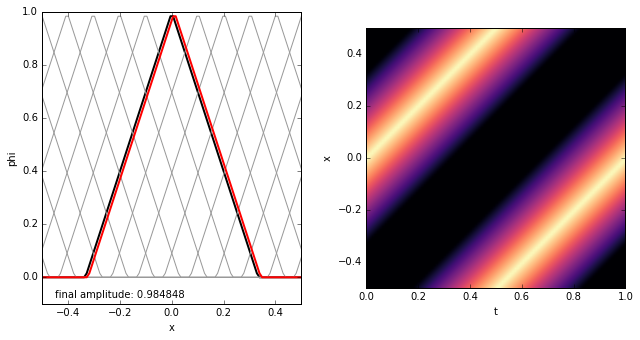

In [20]:
leapfrog(1.0)

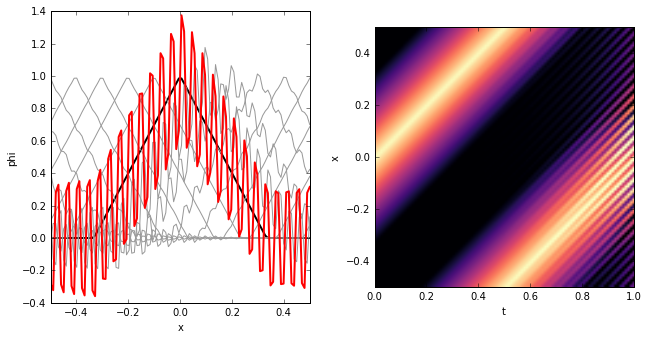

In [21]:
leapfrog(1.003,nx=100)

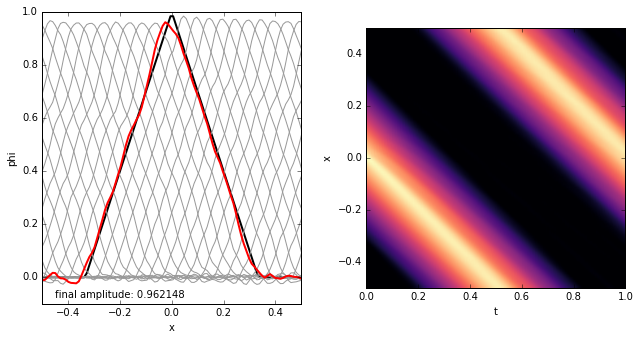

In [22]:
leapfrog(-0.5)

Amplitude error of the upstream scheme

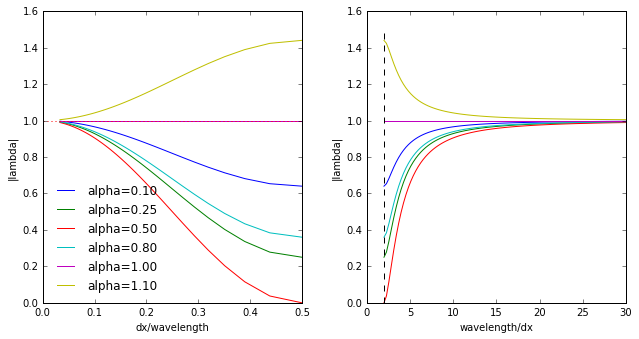

In [23]:
# plot absolute value of the amplification factor for the upstream scheme
# for different wavelengths and courant numbers

# define vectors of k*dx and wavelength/dx
kdeltax= 2*pi/linspace(2,30,100)
wavelendx=2*pi/kdeltax
# courant number to be considered
alphas=[0.1,0.25,0.5,0.8,1.0,1.1]

figure(1,figsize=(9,4.5))
clf()

# plot |lambda| as function of k*dx
axes((0.05,0.05,0.4,0.9))   
for alpha in alphas :
    lam = 1+2*alpha*(alpha-1)*(1-cos(kdeltax))
    plot( 1.0/wavelendx, lam, label='alpha=%4.2f'%alpha )
plot( (0,0.5), (1,1), ':r')
xlabel('dx/wavelength')
ylabel('|lambda|')
legend( frameon=False, loc='lower left')

# plot |lambda| as function of wavelength/dx
axes((0.55,0.05,0.4,0.9))
for alpha in alphas :
    lam = 1+2*alpha*(alpha-1)*(1-cos(kdeltax))
    plot( wavelendx, lam )
plot( (2,2), (0,1.5), '--k' )
xlabel('wavelength/dx')
ylabel('|lambda|')

Phase error of the upstream scheme

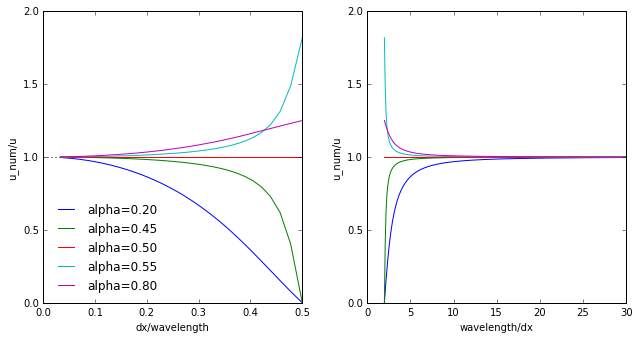

In [24]:
# plot numerical advection velocity / exact advection velocity for the upstream scheme
# for different wavelengths and courant numbers

kdeltax= 2*pi/linspace(2,30,300) # minimum wavelength = 2*deltax
wavelendx=2*pi/kdeltax
alphas=[0.2,0.45,0.5,0.55,0.8]

figure(1,figsize=(9,4.5))
clf()

axes((0.05,0.05,0.4,0.9))
plot( (0,0.5), (1,1), ':k')
for alpha in alphas :
    unum = -angle(1-alpha*(1-exp(-1j*kdeltax)))/(kdeltax*alpha)
    plot( 1.0/wavelendx, unum, label='alpha=%4.2f'%alpha )
legend(loc='lower left',frameon=False)
xlabel('dx/wavelength')
ylabel('u_num/u')

axes((0.55,0.05,0.4,0.9))
for alpha in alphas :
    unum = -angle(1-alpha*(1-exp(-1j*kdeltax)))/(kdeltax*alpha)
    plot( wavelendx, unum )
#plot( (2,2), (0,1.5), 'r' )
xlabel('wavelength/dx')
ylabel('u_num/u')


Amplification factors $\lambda_{1,2}$ for the Leapfrog scheme

In [25]:
def amplification_leapfrog( alpha ) :
    # compute lambda1,2 as function of k*dx
    kdeltax= 2*pi/linspace(2,20,300) # minimum wavelength = 2*deltax
    wavelendx=2*pi/kdeltax
    askdx = array( alpha*sin(kdeltax), dtype=complex ) # complex is important here, otherwise sqrt() will fail for alpha>1
    lam1 = (-1j*askdx + sqrt(1-askdx**2))
    lam2 = (-1j*askdx - sqrt(1-askdx**2))
    # plot ----------------------------------
    figure(2,figsize=(15,7))
    clf()
    # exact solution
    plot( wavelendx, exp(-1j*kdeltax).real,       color='#cccccc', linewidth=5, label='Re lambda_ex' )
    plot( wavelendx, exp(-1j*kdeltax).imag, '--', color='#cccccc', linewidth=5, label='Im lambda_ex' )
    # physical mode
    plot( wavelendx, lam1.real, 'b',                   label='Re lambda1' )
    plot( wavelendx, lam1.imag, '--', color='#0066ff', label='Im lambda1' )
    plot( wavelendx, abs(lam1), '-.' , color='#0099cc', label='|lambda1|', linewidth=3 )
    # non-physical mode
    eps=0.03
    plot( wavelendx+eps, lam2.real, 'r',                   label='Re lambda2' )
    plot( wavelendx+eps, lam2.imag, '--', color='#ff6600', label='Im lambda2' )
    plot( wavelendx+eps, abs(lam2), '-.',  color='#cc9900', label='|lambda2|', linewidth=3 )
    legend(loc='center right',frameon=True, title='alpha=%f'%alpha)
    if alpha <= 1.0 :
        ylim((-1.1,1.1))
    xlim((0,20))
    xlabel('wavelength/dx')
    ylabel('lambda (imaginary=dashed, real=solid)')



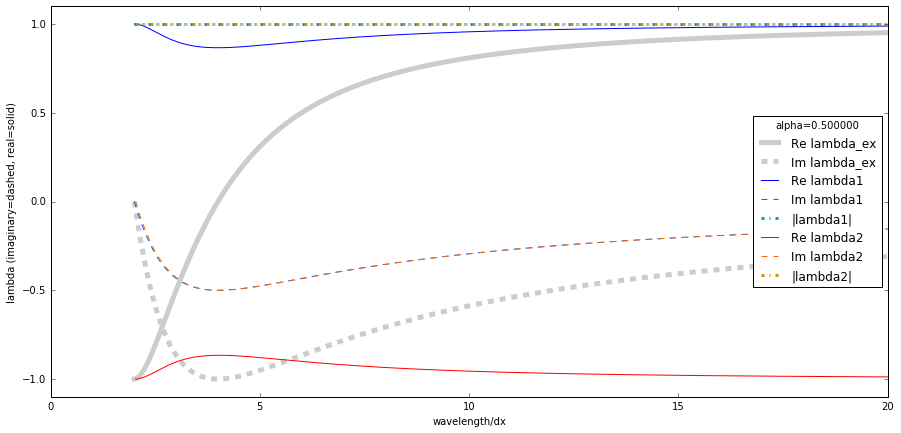

In [26]:
amplification_leapfrog(0.5)

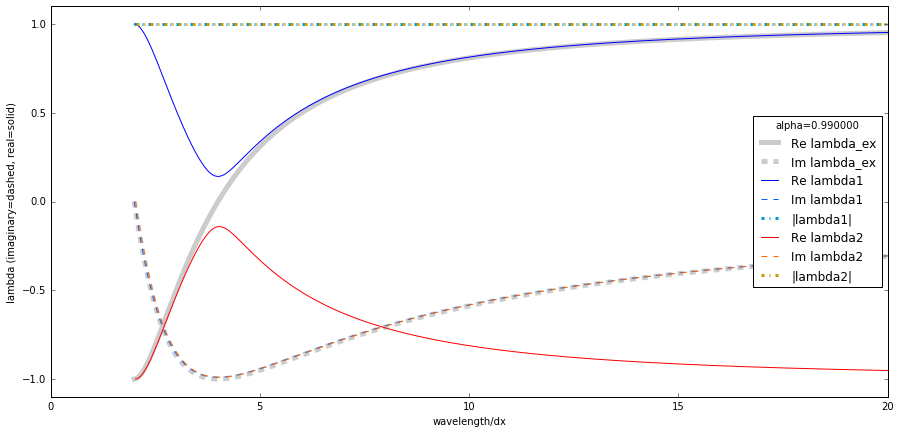

In [27]:
amplification_leapfrog(0.99)

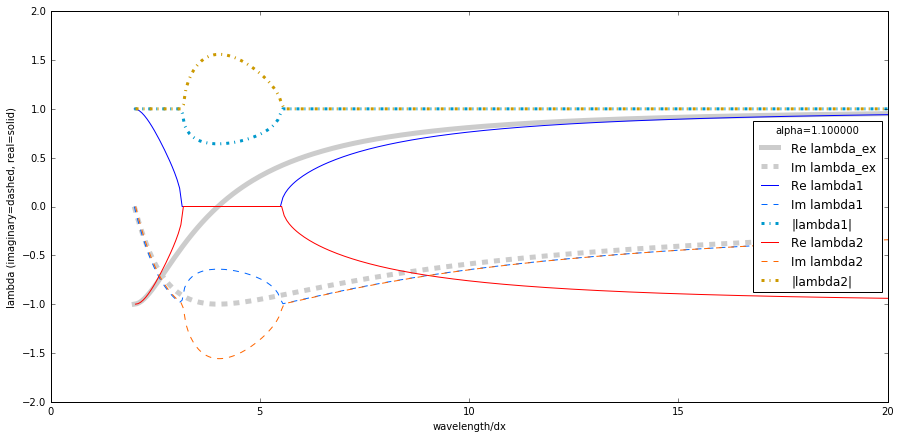

In [28]:
amplification_leapfrog(1.1)

Phase and group velocity error for the Leapfrog scheme

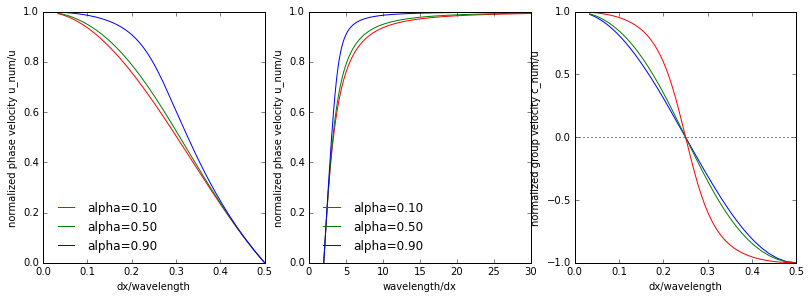

In [29]:
kdeltax= 2*pi/linspace(2,30,300) # minimum wavelength = 2*deltax
wavelendx=2*pi/kdeltax
alphas=[0.1,0.5,0.9]
figure(1,figsize=(13.5,4.5))
clf()
colors=['r','g','b','#ff9900','#66cc00','#9900ff']

subplot(131)
for ialpha, alpha in enumerate(alphas) :
    p = alpha*sin(kdeltax)
    unum  = -(wavelendx/(2*pi*alpha))*angle(-1j*p + sqrt(1-p**2))
    plot( 1.0/wavelendx, unum, color=colors[ialpha], label='alpha=%4.2f'%alpha )
legend(loc='lower left',frameon=False)
xlabel('dx/wavelength')
ylabel('normalized phase velocity u_num/u')

subplot(132)
for ialpha, alpha in enumerate(alphas) :
    p = alpha*sin(kdeltax)
    unum = -(wavelendx/(2*pi*alpha))*angle(-1j*p + sqrt(1-p**2))
    plot( wavelendx, unum, color=colors[ialpha], label='alpha=%4.2f'%alpha )
plot( (2,20), (1,1), ':r')
legend(loc='lower left',frameon=False)
xlabel('wavelength/dx')
ylabel('normalized phase velocity u_num/u')

subplot(133)
for ialpha, alpha in enumerate(alphas) :
    p = alpha*sin(kdeltax)
    cnum = cos(2*pi/wavelendx)/sqrt(1-p**2)
    plot( 1.0/wavelendx, cnum )
plot( (0,0.5), (0,0), ':k' )
xlabel('dx/wavelength')
ylabel('normalized group velocity c_num/u')



Leapfrog scheme: Initial condition with small wavelength componen

In [30]:
def leapfrog_noisy(alpha,asselin=0.0) :
    
    # define grid
    nx = 100
    nt = int(round(nx/alpha))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,1,nt)
    
    # set initial state
    phi = zeros((nt,nx))
    for i in [nx/2-4,nx/2-2,nx/2,nx/2+2,nx/2+4] :
        phi[0,i] = 1.0
    for i in [nx/2-3,nx/2-1,nx/2+1,nx/2+3] :
        phi[0,i] = 0.25
    
    # plot initial state
    figure(1,figsize=(13,6.5))
    clf()
    
    subplot(121)
    plot( x, phi[0,:], 'k', linewidth=2)
    
    # first step: upstream scheme
    phi[1,:] = phi[0,:] - alpha*(phi[0,:]-roll(phi[0,:],-1))
    
    for n in range(1,nt-1) :
    
        # leapfrog step
        phi[n+1,:] = phi[n-1,:] - alpha*(roll(phi[n,:],1)-roll(phi[n,:],-1))
        
        # asselin filter
        phi[n,:] = phi[n,:] + asselin*(phi[n-1,:] -2*phi[n,:] + phi[n+1,:] )

        if n == nt/4 : # plot state at t=0.25
            plot( x, phi[n,:], '#999999')
    
    plot( x, phi[-1,:], 'r', linewidth=2)
    xlabel('x')
    ylabel('phi')
    xlim((-0.5,0.5))
    if phi[-1,:].max() < 1 :
        ylim((-0.1,1.0))
        text( -0.45, -0.08, 'final amplitude: %f' % phi[-1,:].max() )
    
    # space-time plot
    subplot(122)
    img=imshow(transpose(phi),vmin=-0.5,extent=[0,1,-0.5,0.5])
    colorbar(img,ax=gca(),shrink=0.75)
    xlabel('t')
    ylabel('x')


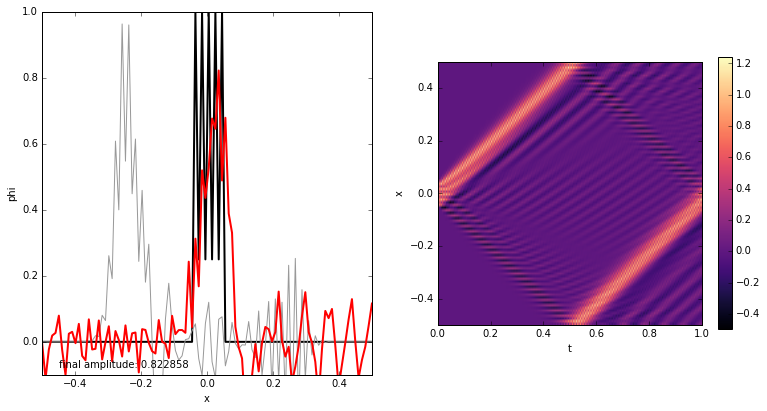

In [31]:
leapfrog_noisy(0.5,asselin=0.0)

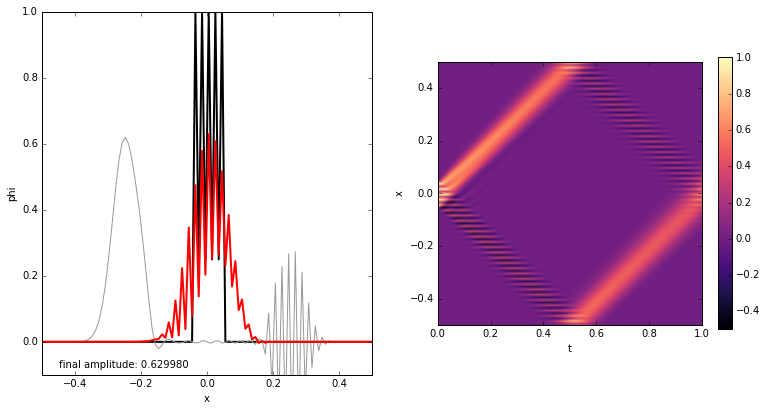

In [32]:
leapfrog_noisy(0.5,asselin=0.3)

Leapfrog solution of the nonlinear Burgers equation (with and without digital filter)

In [33]:
def leapfrog_nonlinear(alpha,stabilize=True,nx=100) :

    # define grid
    nt = int(round(nx/alpha))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,0.5,nt)

    # set initial state
    phi = zeros((nt,nx))
    phi[0,:] = sin(2*x*2*pi)

    # plot initial state
    figure(1,figsize=(9,4.5))
    clf()
    axes((0.05,0.05,0.4,0.9))
    plot( x, phi[0,:], 'k', linewidth=2)

    # first step: upstream scheme
    phi[1,:] = phi[0,:] - alpha*phi[0,:]*(phi[0,:]-roll(phi[0,:],-1))
    #n=2; phi[n+1,:] = 0.5*phi[n+1,:] + 0.25*roll(phi[n+1,:],1) +0.25*roll(phi[n+1,:],-1)
    
    # subsequent steps: leapfrog
    for n in range(1,nt-1) :

        # leapfrog step
        phi[n+1,:] = phi[n-1,:] + alpha*phi[n,:]*(roll(phi[n,:],1)-roll(phi[n,:],-1))

        # digital filter
        if stabilize :
            phi[n+1,:] = phi[n+1,:] - 0.25*( -roll(phi[n+1,:],1) + 2*phi[n+1,:] - roll(phi[n+1,:],-1) )
        
        if n % (nt/10) == 0 : # plot state every 0.05 time units
            #if n>0 and n%10 == 0 :
            plot( x, phi[n,:], '#999999')
    plot( x, phi[-1,:], 'r', linewidth=2)
    xlabel('x')
    ylabel('phi')
    xlim((-0.5,0.5))
    
    # space-time plot
    axes((0.55,0.05,0.4,0.9))
    imshow(transpose(phi[:,::-1]),vmin=-1,vmax=1,extent=[0,t.max(),x.min(),x.max()],aspect=0.5)
    xlabel('t')
    ylabel('x')


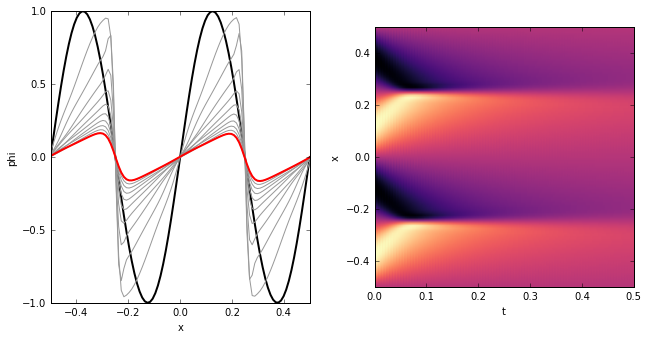

In [34]:
leapfrog_nonlinear(0.3,stabilize=True)

/software/meteo/Malachite/x86_64/python/2.7-conda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: overflow encountered in multiply
/software/meteo/Malachite/x86_64/python/2.7-conda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in subtract
/software/meteo/Malachite/x86_64/python/2.7-conda/lib/python2.7/site-packages/matplotlib/colors.py:576: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


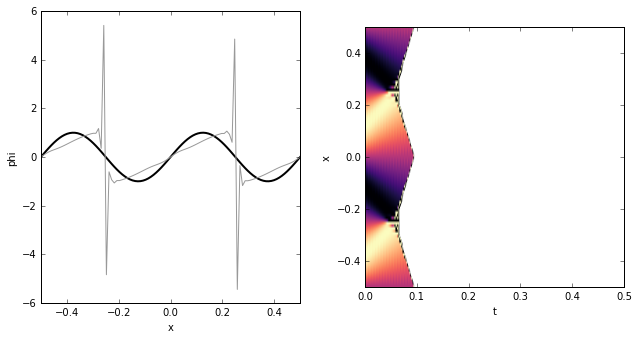

In [35]:
leapfrog_nonlinear(0.3,stabilize=False) # crashes...

In [36]:
def lax_wendroff(alpha) :
    nx = 100
    nt = int(round(nx/abs(alpha)))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,1,nt)
    phi = zeros((nt,nx))
    phi[0,:] = maximum( -abs(3*x)+1.0, 0 )
    figure(1,figsize=(9,4.5))
    clf()
    axes((0.05,0.05,0.4,0.9))
    plot( x, phi[0,:], 'k', linewidth=2)
    for n in range(nt-1) :
        phi[n+1,:] = phi[n,:] - 0.5*alpha*( roll(phi[n,:],1) - roll(phi[n,:],-1) ) \
                   + 0.5*alpha*alpha*( roll(phi[n,:],1) - 2*phi[n,:] + roll(phi[n,:],-1) )
        if n>0 and n%10 == 0 :
            plot( x, phi[n,:], '#999999')
    plot( x, phi[-1,:], 'r', linewidth=2)
    if phi[-1,:].max() < 1.5 :
        ylim((-0.1,1.0))
        text( -0.45, -0.08, 'final amplitude: %f' % phi[-1,:].max() )
    xlabel('x')
    ylabel('phi')
    axes((0.55,0.05,0.4,0.9))   
    imshow(transpose(phi),vmin=0,vmax=1,extent=[0,1,-0.5,0.5])
    xlabel('t')
    ylabel('x')
    
    

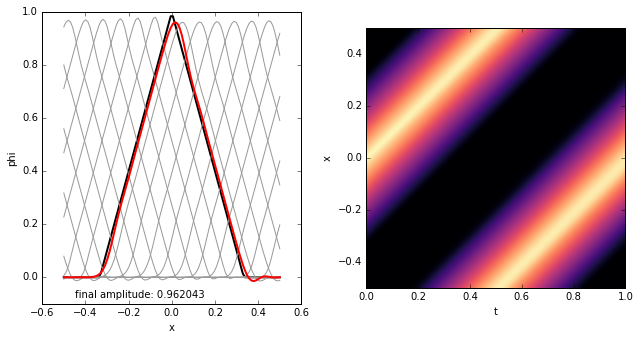

In [37]:
lax_wendroff(0.8)

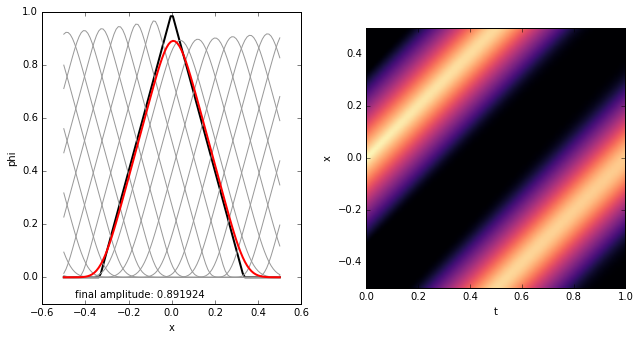

In [38]:
upstream(0.8)

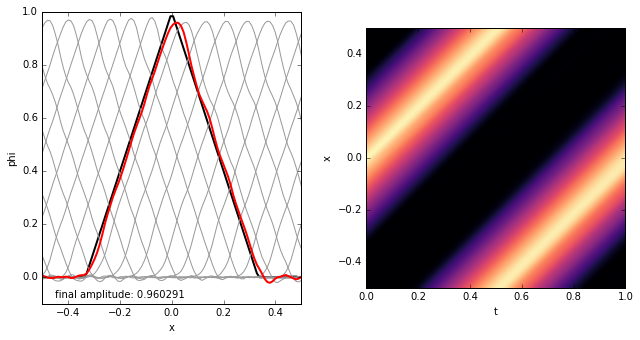

In [39]:
leapfrog(0.8)

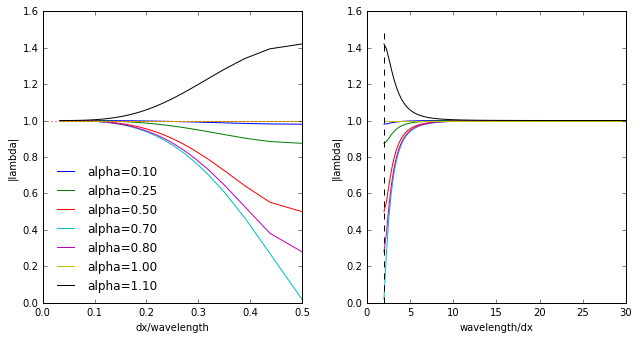

In [40]:
# plot absolute value of the amplification factor for the lax-wendroff scheme
# for different wavelengths and courant numbers

# define vectors of k*dx and wavelength/dx
kdeltax= 2*pi/linspace(2,30,100)
wavelendx=2*pi/kdeltax
# courant number to be considered
alphas=[0.1,0.25,0.5,0.7,0.8,1.0,1.1]
#alphas=[0.2,0.5,0.6,0.706,0.708,0.8,0.9,0.99,1.1]

figure(1,figsize=(9,4.5))
clf()

# plot |lambda| as function of k*dx
axes((0.05,0.05,0.4,0.9))   
for alpha in alphas :
    lam = 1 + (alpha**2)*(cos(kdeltax)-1) - 1j*alpha*sin(kdeltax)
    plot( 1.0/wavelendx, sqrt(real(lam)**2 + imag(lam)**2), label='alpha=%4.2f'%alpha )
plot( (0,0.5), (1,1), ':r')
xlabel('dx/wavelength')
ylabel('|lambda|')
legend( frameon=False, loc='lower left')

# plot |lambda| as function of wavelength/dx
axes((0.55,0.05,0.4,0.9))
for alpha in alphas :
    lam = 1 + (alpha**2)*(cos(kdeltax)-1) - 1j*alpha*sin(kdeltax)
    plot( wavelendx, sqrt(real(lam)**2 + imag(lam)**2) )
plot( (2,2), (0,1.5), '--k' )
xlabel('wavelength/dx')
ylabel('|lambda|')

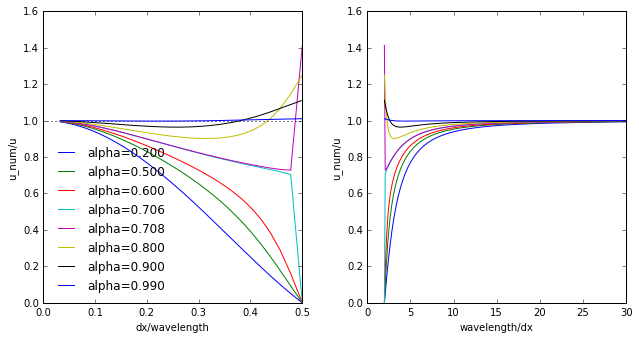

In [41]:
# plot numerical advection velocity / exact advection velocity for the lax-wendroff scheme
# for different wavelengths and courant numbers

kdeltax= 2*pi/linspace(2,30,300) # minimum wavelength = 2*deltax
wavelendx=2*pi/kdeltax
alphas=[0.2,0.5,0.6,0.706,0.708,0.8,0.9,0.99]

figure(1,figsize=(9,4.5))
clf()

axes((0.05,0.05,0.4,0.9))
plot( (0,0.5), (1,1), ':k')
for alpha in alphas :
    unum = -angle(1 + (alpha**2)*(cos(kdeltax)-1) - 1j*alpha*sin(kdeltax)) / (kdeltax*alpha)
    #unum2 = arccos( (1 + 2*(alpha**2)*(cos(kdeltax)-1))/sqrt((1+(cos(kdeltax)-1)**2)*(alpha**4-alpha**2)))/ (kdeltax*alpha)
    plot( 1.0/wavelendx, unum, label='alpha=%5.3f'%alpha )
    #plot( 1.0/wavelendx, unum2, '--', label='alpha=%4.2f'%alpha )
legend(loc='lower left',frameon=False)
xlabel('dx/wavelength')
ylabel('u_num/u')

axes((0.55,0.05,0.4,0.9))
for alpha in alphas :
    unum = -angle(1 + (alpha**2)*(cos(kdeltax)-1) - 1j*alpha*sin(kdeltax)) / (kdeltax*alpha)
    plot( wavelendx, unum )
#plot( (2,2), (0,1.5), 'r' )
xlabel('wavelength/dx')
ylabel('u_num/u')

Semi-Lagrangian solution of the nonlinear Burgers equation

In [42]:
from numpy import *
from pylab import *
from scipy import interpolate
def semilagrange_nonlinear(alpha, it_max=100) :
    
    # define grid
    nx = 100
    nt = int(round(nx/abs(alpha)))
    x = linspace(-0.5,0.5,nx)
    t = linspace(0,0.5,nt)
    dt = t[1]-t[0]
    
    # set initial state
    phi = zeros((nt,nx))
    phi[0,:] = sin(2*x*2*pi)
    
    # plot initial state
    figure(1,figsize=(13.5,4.5))
    clf()
    subplot(131)
    plot( x, phi[0,:], 'k', linewidth=2)
    iterations = zeros(nt,dtype=int)
    for n in range(0,nt-1) :

        # first guess for departure points
        xdep = x - dt*phi[n,:]
        idcs = where(xdep<-0.5); xdep[idcs]+=1.0
        idcs = where(xdep> 0.5); xdep[idcs]-=1.0
        phiint = interpolate.interp1d( x, phi[n,:], kind='linear' )
        phi[n+1,:] = phiint(xdep)

        # determine new departure points iteratively
        iterations[n] = it_max
        for it in range(it_max) :
            xdep = x - 0.5*dt*(phi[n,:]+phi[n+1,:])
            idcs = where(xdep<-0.5); xdep[idcs]+=1.0
            idcs = where(xdep> 0.5); xdep[idcs]-=1.0
            phiint = interpolate.interp1d( x, phi[n,:], kind='linear' )
            newphi = phiint(xdep)
            if abs(phi[n+1,:]-newphi).max() < 1e-8 :
                iterations[n] = it
                break
            phi[n+1,:] = newphi
            
        if n % (nt/4) == 0 : # plot state every 0.125 time units
            plot( x, phi[n,:], '#999999')
    plot( x, phi[-1,:], 'r', linewidth=2)
    xlabel('x')
    ylabel('phi')
    xlim((-0.5,0.5))
    
    # space-time plot
    subplot(132)
    imshow(transpose(phi[:,::-1]),vmin=-1,vmax=1,extent=[0,t.max(),x.min(),x.max()],aspect=0.5)
    xlabel('t')
    ylabel('x')
    
    subplot(133)
    plot(iterations)
    xlabel('step')
    ylabel('iterations')


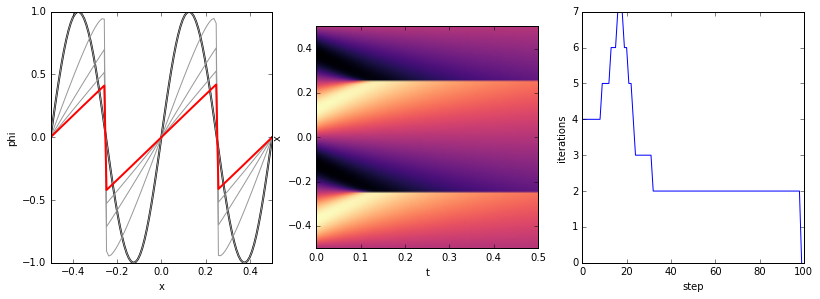

In [43]:
semilagrange_nonlinear(1.0)

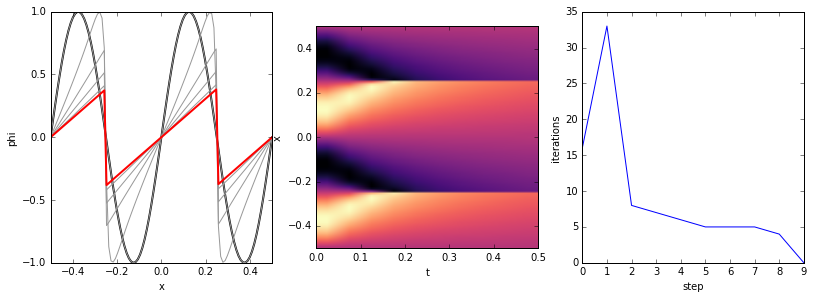

In [44]:
semilagrange_nonlinear(10.0)

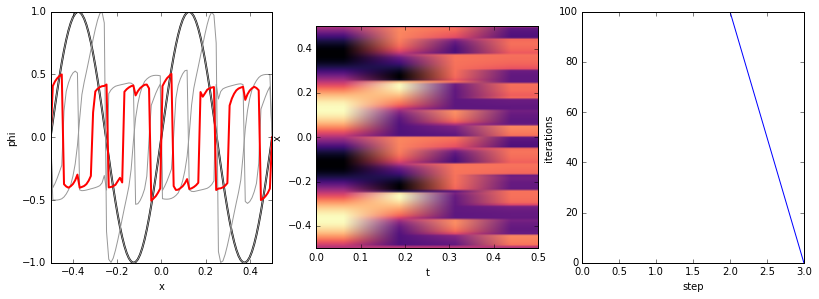

In [45]:
semilagrange_nonlinear(25.0)

Simplified shallow-water-like equations: Numerical dispersion relation for leapfrog scheme with and without grid staggering

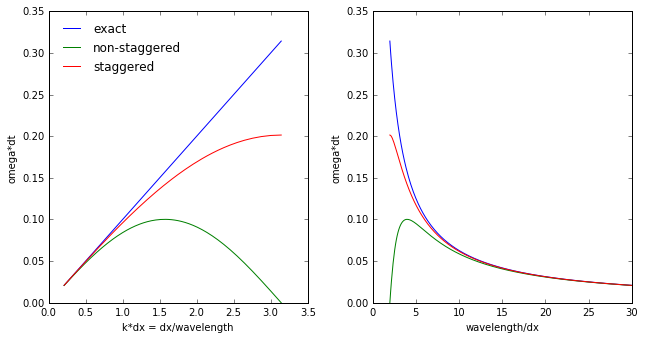

In [46]:
kdeltax= 2*pi/linspace(2,30,300) # minimum wavelength = 2*deltax
wavelendx=2*pi/kdeltax
deltax=0.1
deltat=0.01
H=1.0
omega_ex   = sqrt(H)*kdeltax/deltax
omega_std  = (1/deltat)*arcsin( deltat*sqrt(H)*sin(kdeltax)/deltax)
omega_stag = (1/deltat)*arcsin( deltat*sqrt(H)*sin(kdeltax/2)/(deltax/2) )

alphas=[0.1,0.5,0.9]
figure(1,figsize=(9,4.5))
clf()
axes((0.05,0.05,0.4,0.9))
plot( kdeltax, omega_ex*deltat, label='exact' )
plot( kdeltax, omega_std*deltat, label='non-staggered' )
plot( kdeltax, omega_stag*deltat, label='staggered' )
legend(loc='upper left',frameon=False)
xlabel('k*dx = dx/wavelength')
ylabel('omega*dt')

axes((0.55,0.05,0.4,0.9))
plot( wavelendx, omega_ex*deltat, label='exact' )
plot( wavelendx, omega_std*deltat, label='non-staggered' )
plot( wavelendx, omega_stag*deltat, label='staggered' )
xlabel('wavelength/dx')
ylabel('omega*dt')
